## Importing modules

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Reading and cleaning the data

## Reading in a data file

Let's try to read one file. The problem with real data such as this is that the files are almost never formatted in a convenient way. In this exercise, there are several problems to overcome in reading the file. First, there is no header, and thus the columns don't have labels. There is also no obvious index column, since none of the data columns contain a full date or time.

Your job is to read the file into a DataFrame using the default arguments. After inspecting it, you will re-read the file specifying that there are no headers supplied.


In [3]:
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.txt')
df.head()

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


## Re-assigning column names

After the initial step of reading in the data, the next step is to clean and tidy it so that it is easier to work with.

In this exercise, you will begin this cleaning process by re-assigning column names and dropping unnecessary columns.

pandas has been imported in the workspace as pd, and the file NOAA_QCLCD_2011_hourly_13904.txt has been parsed and loaded into a DataFrame df. The comma separated string of column names, column_labels, and list of columns to drop, list_to_drop, have also been loaded for you.

* df.columns - (an attribute of a [dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html))
* [df.drop()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [7]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag',  'visibilityFlag',  'wx_and_obst_to_vision',  'wx_and_obst_to_visionFlag',  'dry_bulb_farenFlag',  'dry_bulb_celFlag',  'wet_bulb_farenFlag',  'wet_bulb_celFlag',  'dew_point_farenFlag',  'dew_point_celFlag',  'relative_humidityFlag',  'wind_speedFlag',  'wind_directionFlag',  'value_for_wind_character',  'value_for_wind_characterFlag',  'station_pressureFlag',  'pressure_tendencyFlag',  'pressure_tendency',  'presschange',  'presschangeFlag',  'sea_level_pressureFlag',  'hourly_precip',  'hourly_precipFlag',  'altimeter',  'record_type',  'altimeterFlag',  'junk']


In [11]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop,axis='columns')

# Print the output of df_dropped.head()
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
1,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
3,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
4,13904,20110101,553,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


Now that you have informative column names, it is a lot easier to interpret the data! But there is still some tidying work to be done: You'll clean the datetime data in the next exercise.

## Cleaning and tidying datetime data

In order to use the full power of pandas time series, you must construct a DatetimeIndex. To do so, it is necessary to clean and transform the date and time columns.

Your job is to clean up the date and Time columns and combine them into a datetime collection to be used as the Index.

In [13]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
2011-01-01 05:53:00,13904,20110101,0553,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


## Cleaning the numeric columns

The numeric columns contain missing values labeled as 'M'. In this exercise, your job is to transform these columns such that they contain only numeric values and interpret missing data as NaN.

The pandas function pd.to_numeric() is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument errors='coerce', you can force strings like 'M' to be interpreted as NaN.


In [15]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 08:00:00':'2011-06-20 09:00:00','dry_bulb_faren'])
print()

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 08:00:00':'2011-06-20 09:00:00','dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


# Statistical exploratory data analysis

## Signal min, max, median

Now that you have the data read and cleaned, you can begin with statistical EDA. First, you will analyze the 2011 Austin weather data.

Your job in this exercise is to analyze the 'dry_bulb_faren' column and print the median temperatures for specific time ranges. You can do this using partial datetime string selection.

In [20]:
# Print the median of the dry_bulb_faren column
print('Overall Median:',df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print('Median Apr-Jun \'11:',df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print('Median Jan:',df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())


Overall Median: 72.0
Median Apr-Jun '11: 78.0
Median Jan: 48.0


## Signal variance

You're now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

Your job is to first resample df_clean and df_climate by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - 'dry_bulb_faren' in df_clean, and 'Temperature' in df_climate - as NumPy arrays and compute the difference.

Notice that the indexes of df_clean and df_climate are not aligned - df_clean has dates in 2011, while df_climate has dates in 2010. This is why you extract the temperature columns as NumPy arrays. An alternative approach is to use the pandas .reset_index() method to make sure the Series align properly. You will practice this approach as well.

* [df.reset_index()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

In [21]:
# This exercise also uses the weather data from Austin, Texas
df_climate = pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True)
df_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1
2010-01-01 01:00:00,44.6,37.1,1
2010-01-01 02:00:00,44.1,36.9,1
2010-01-01 03:00:00,43.8,36.9,1
2010-01-01 04:00:00,43.5,36.8,1


In [22]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())


1.330083921569873


## Sunny or cloudy

On average, how much hotter is it when the sun is shining? In this exercise, you will compare temperatures on sunny days against temperatures on overcast days.

Your job is to use Boolean selection to filter out sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

The column 'sky_condition' of the DataFrame 'df_clean' provides information about whether the day was sunny ('CLR') or overcast ('OVC').

In [25]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition'] == 'CLR']

# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())


Wban               0.000000
StationType        0.000000
visibility         0.174359
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


# Visual exploratory data analysis

## Weekly average temperature and visibility

Is there a correlation between temperature and visibility? Let's find out.

In this exercise, your job is to plot the weekly average temperature and visibility as subplots. To do this, you need to first select the appropriate columns and then resample by week, aggregating the mean.

In addition to creating the subplots, you will compute the Pearson correlation coefficient using .corr(). The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

* [df.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)

                visibility  dry_bulb_faren
visibility         1.00000         0.49004
dry_bulb_faren     0.49004         1.00000


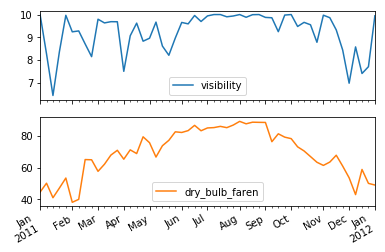

In [26]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

## Daily hours of clear sky

In a previous exercise, you analyzed the 'sky_condition' column to explore the difference in temperature on sunny days compared to overcast days. Recall that a 'sky_condition' of 'CLR' represents a sunny day. In this exercise, you will explore sunny days in greater detail. Specifically, you will use a box plot to visualize the fraction of days that are sunny.

The 'sky_condition' column is recorded hourly. Your job is to resample this column appropriately such that you can extract the number of sunny hours in a day and the number of total hours. Then, you can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

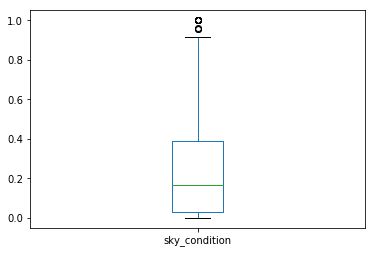

In [30]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean.loc[:,'sky_condition'] == 'CLR'

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample('D').count()

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

## Heat or humidity

Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

In this exercise, you will explore the maximum temperature and dew point of each month. The columns of interest are 'dew_point_faren' and 'dry_bulb_faren'. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots. Uncomfortably, you will notice that the maximum dew point is above 65 every month! 

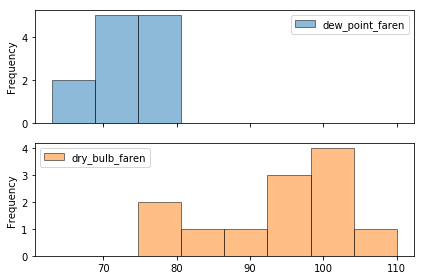

In [32]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True, edgecolor='k')

# Show the plot
plt.tight_layout()
plt.show()

## Probability of high temperatures

We already know that 2011 was hotter than the climate normals for the previous thirty years. In this final exercise, you will compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, you will use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value. To do this, you will leverage the data manipulation, filtering, resampling, and visualization skills you have acquired throughout this course.

The two DataFrames df_clean and df_climate are available in the workspace. Your job is to select the maximum temperature in August in df_climate, and then maximum daily temperatures in August 2011. You will then filter out the days in August 2011 that were above the August 2010 maximum, and use this to construct a CDF plot.

Once you've generated the CDF, notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!

In [35]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-8','Temperature'].max()
print('August Max:',august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()


August Max: 95.3


August Max: 95.3


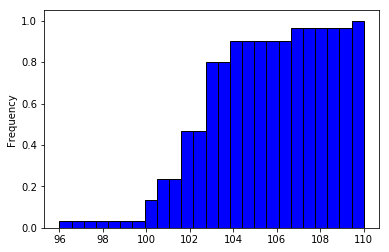

In [37]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-8','Temperature'].max()
print('August Max:',august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()

# Filter out days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011.loc[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist',bins=25, normed=True, cumulative=True, edgecolor='k', color='blue')

# Display the plot
plt.show()

Notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!

## Appendix: Methods
* [df.drop()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)
* [df.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
* [df.reset_index()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)
